#**Lab 2 Klasifikasi Naive Bayes dengan Data Dummy**

**Langkah 1 - Buat Dataset Dummy**

In [1]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print(X)
print(y)

[[ 99  79]
 [393 183]
 [ 23  77]
 [ 61  95]
 [ 76 150]
 [152 149]
 [137  99]
 [109  16]
 [166  43]
 [ 91 104]
 [ 86 117]
 [ 91 104]
 [145  67]
 [ 90 102]
 [168  43]
 [ 35 219]
 [ 99 103]
 [282  91]
 [163  92]
 [ 94 101]
 [158 101]
 [ 14 112]
 [110  90]
 [156 229]
 [ 95  49]
 [ 81   5]
 [138 178]
 [ 98  52]
 [104 153]
 [119 159]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Parameter yang digunakan pada fungsi make_classification adalah,

n_samples: jumlah sampel yang diinginkan

n_features: jumlah fitur yang digunakan

n_classes: jumlah kelas

n_informative: jumlah fitur yang memiliki korelasi dengan kelas

n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas

n_repeated: jumlah fitur yang diulang

**Langkah 2 (Opsional) - Membuat Data Frame**

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya.

In [2]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,99,79,0
1,393,183,0
2,23,77,0
3,61,95,0
4,76,150,0


**Langkah 3 (Opsional) - Labeling**

 Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [3]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,99,79,Kelas B
1,393,183,Kelas B
2,23,77,Kelas B
3,61,95,Kelas B
4,76,150,Kelas B


**Langkah 4 - Visualisasi Data**

/tmp/ipython-input-2947333296.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-2947333296.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


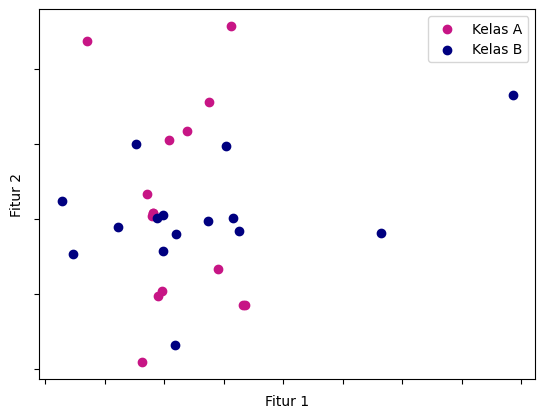

In [4]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

**Langkah 5 - Model Multinomial Naive Bayes**

Selanjutnya buat model naive bayes dengan jenis multinomoial. Sejatinya, model multinomial digunakan untuk fitur yang bersifat diskrit (e.g. jumlah kata untuk klasifikasi teks). Akan tetapi kita akan mencoba menggunakan model ini untuk konteks data kontinu hanya sebagai pembelajaran.

In [5]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.6666666666666666


**Langkah 6 - Model Gaussian Naive Bayes**

Model Gaussian lebih cocok digunakan untuk data kontinu yang kita miliki, hal ini dikarenakan model ini menggunakan distribusi gaussian (normal) yang secara alami memiliki rentang dengan nilai kontinu.

In [6]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.5714285714285714
Hasil akurasi data test (Gaussian): 0.4444444444444444


Meskipun hasilnya tidak jauh berbeda dengan model multimodal, secara teoritis kita telah menerapkan langkah yang benar dalam membuat sebuah model klasifikasi dengan menggunakan Naive Bayes.